# What is it that people want to learn about in Data Science?

In this project we will analyze [datascience.stackexchange.com](datascience.stackexchange.com) to understand what's trending among Data Science learners around the globe. [datascience.stackexchange.com](datascience.stackexchange.com) is a platform withing the Stack Exchange group, for questions and answers focused on Data Science.

The home page is subdiveded into:
- a panel for shortcuts
- questions
- hot network questions (questions on other Stack Exchange sites)

In each post there is the following information:
- title
- last active
- viewed
- question date
- tags

### Finding the most popular content

By exploring the [Query Data Science](https://data.stackexchange.com/datascience/query/new) page we can query a few tables that may give us important information:
- In the table `Posts` we can find the questions posted by user, associated among others, with a title, tags and a score.
- In the table `Tags` we can find and sort the tags within the website. The top 3 by count are `machine-learning`, `python` and `neural-network`.

We will extract and analyze the table `Posts`.

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt

In [2]:
posts = pd.read_csv('2019_questions.csv')

In [3]:
posts.head(100)

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN
5,44430,2019-01-23 11:13:32,0,283,<fuzzy-logic>,1,NaN
6,44432,2019-01-23 11:17:46,1,214,<time-series><anomaly-detection><online-learning>,0,1.0
7,44436,2019-01-23 12:49:39,0,9,<matrix-factorisation>,0,NaN
8,44437,2019-01-23 13:04:11,0,7,<correlation><naive-bayes-classifier>,0,NaN
9,44438,2019-01-23 13:16:29,0,584,<machine-learning><python><deep-learning><kera...,1,NaN


In [4]:
posts.shape[0]

8839

In [5]:
posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null object
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: float64(1), int64(4), object(2)
memory usage: 483.5+ KB


In [6]:
posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null object
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: float64(1), int64(4), object(2)
memory usage: 483.5+ KB


A few remarks:

- In total there are 8839 rows;
- In `FavoriteCount`, only 1407 rows are non-null;
- `CreationDate` should be of the `datetime64` type;
- We can apply dataframe string methogs to `Tags` to get individual values.

We will start by cleaning the dataframe.

In [7]:
posts.fillna(0,inplace=True)

In [8]:
posts['CreationDate'] = pd.to_datetime(posts['CreationDate'])

In [9]:
posts['Tags'] = posts['Tags'].str.replace('><',',')
posts['Tags'] = posts['Tags'].str.replace('<','')
posts['Tags'] = posts['Tags'].str.replace('>','')
posts['Tags']

0                            machine-learning,data-mining
1       machine-learning,regression,linear-regression,...
2                 python,time-series,forecast,forecasting
3                       machine-learning,scikit-learn,pca
4                     dataset,bigdata,data,speech-to-text
5                                             fuzzy-logic
6           time-series,anomaly-detection,online-learning
7                                    matrix-factorisation
8                      correlation,naive-bayes-classifier
9         machine-learning,python,deep-learning,keras,cnn
10                                       machine-learning
11                                machine-learning,theory
12                      machine-learning,gradient-descent
13      nlp,clustering,feature-extraction,encoding,emb...
14                       python,scikit-learn,pandas,numpy
15      python,scikit-learn,decision-trees,accuracy,ma...
16                                          python,pandas
17            

### Determining the most popular tag

Our next step is, for each tag, to count how many times it was used, and how may times a question with that tag was viewed.

In [10]:
d = {}

for l in posts['Tags'].str.split(','):
    for tag in l:
        if tag in d:
            d[tag] += 1
        else:
            d[tag] = 1

In [11]:
tags = pd.DataFrame.from_dict(d,orient='index',columns=['used_count'])

In [13]:
views = posts['ViewCount'].tolist()
tags_lists = posts['Tags'].str.split(',').tolist()

In [18]:
d = {}
for l,c in list(zip(tags_lists,views)):
    for tag in l:
        if tag in d:
            d[tag] += c
        else:
            d[tag] = c

In [20]:
tags['view_count'] = pd.Series(d)

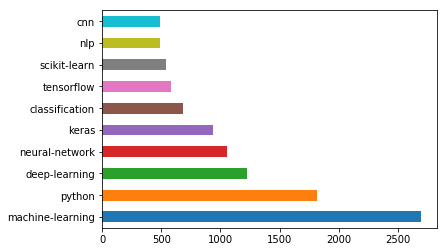

In [48]:
tags.sort_values('used_count',ascending=False,inplace=True)
tags['used_count'].head(10).plot(kind='barh')

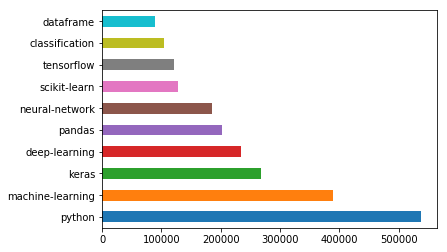

In [40]:
tags.sort_values('view_count',ascending=False,inplace=True)
tags['view_count'].head(10).plot(kind='barh')

### Finding related tags

In [49]:
related = pd.DataFrame(index=tags.index[:15],columns=tags.index[:15])

In [50]:
related

,machine-learning,python,deep-learning,neural-network,keras,classification,tensorflow,scikit-learn,nlp,cnn,time-series,lstm,pandas,regression,dataset
machine-learning,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
deep-learning,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neural-network,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
keras,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
classification,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tensorflow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
scikit-learn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nlp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cnn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
related.fillna(0,inplace=True)

In [65]:
for ts in posts['Tags'].str.split(','):
    for t1 in related.index:
        for t2 in related.columns:
            if (t1 in ts) and (t2 in ts):
                if related.loc[t1,t2] == 0:
                    related.loc[t1,t2] = 1
                else:
                    related.loc[t1,t2] += 1

In [66]:
related

,machine-learning,python,deep-learning,neural-network,keras,classification,tensorflow,scikit-learn,nlp,cnn,time-series,lstm,pandas,regression,dataset
machine-learning,2693,499,429,366,195,259,106,188,113,124,131,71,62,119,99
python,499,1814,160,137,280,98,167,235,71,62,105,61,244,59,53
deep-learning,429,160,1220,305,247,59,136,16,72,160,44,103,1,21,32
neural-network,366,137,305,1055,235,65,108,24,24,118,33,69,1,42,20
keras,195,280,247,235,935,58,256,34,23,116,51,133,3,31,13
classification,259,98,59,65,58,685,20,47,35,20,25,20,3,34,28
tensorflow,106,167,136,108,256,20,584,15,11,57,9,43,3,9,9
scikit-learn,188,235,16,24,34,47,15,540,12,0,12,2,37,37,9
nlp,113,71,72,24,23,35,11,12,493,7,0,19,3,2,11
cnn,124,62,160,118,116,20,57,0,7,489,8,24,1,6,11


In [75]:
for i in range(related.shape[0]):
    related.iloc[i,i] = np.NaN

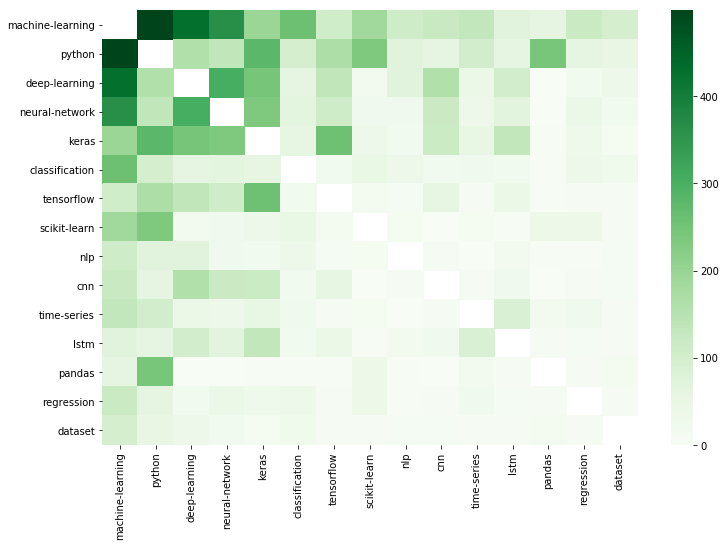

In [77]:
plt.figure(figsize=(12,8))
sns.heatmap(related,cmap='Greens')

### Tracking the interest in deep learning across time

In [82]:
all_quest = pd.read_csv('all_questions.csv')

In [83]:
all_quest.head()

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,<python><keras><tensorflow><cnn><probability>
1,45418,2019-02-12 00:50:39,<neural-network>
2,45422,2019-02-12 04:40:51,<python><ibm-watson><chatbot>
3,45426,2019-02-12 04:51:49,<keras>
4,45427,2019-02-12 05:08:24,<r><predictive-modeling><machine-learning-mode...


In [92]:
all_quest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21576 entries, 0 to 21575
Data columns (total 3 columns):
Id              21576 non-null int64
CreationDate    21576 non-null object
Tags            21576 non-null object
dtypes: int64(1), object(2)
memory usage: 505.8+ KB


In [89]:
all_quest['Tags'] = all_quest['Tags'].str.replace('><',',')
all_quest['Tags'] = all_quest['Tags'].str.replace('<','')
all_quest['Tags'] = all_quest['Tags'].str.replace('>','')
all_quest['Tags'] = all_quest['Tags'].str.split(',')

In [91]:
all_quest.head()

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]"
1,45418,2019-02-12 00:50:39,[neural-network]
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]"
3,45426,2019-02-12 04:51:49,[keras]
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode..."


In [93]:
all_quest['CreationDate'] = pd.to_datetime(all_quest['CreationDate'])

In [95]:
all_quest['DeepLearning'] = all_quest['Tags'].apply(lambda x : True if 'deep-learning' in x else False)

In [98]:
all_quest.head(20)

,Id,CreationDate,Tags,DeepLearning
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",False
1,45418,2019-02-12 00:50:39,[neural-network],False
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",False
3,45426,2019-02-12 04:51:49,[keras],False
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",False
5,45428,2019-02-12 05:43:18,[cnn],False
6,45430,2019-02-12 06:20:30,"[machine-learning, learning]",False
7,45431,2019-02-12 07:26:56,[machine-learning],False
8,45433,2019-02-12 08:56:23,"[python, keras, tensorflow, lstm]",False
9,45434,2019-02-12 09:09:01,"[neural-network, feature-selection, mlp]",False


In [103]:
all_quest['yyyymm'] = all_quest['CreationDate'].dt.year*100 + all_quest['CreationDate'].dt.month

In [106]:
bymonth = all_quest.groupby('yyyymm')

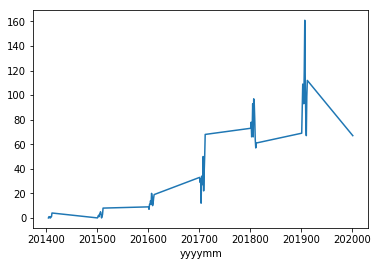

In [113]:
bymonth.sum()['DeepLearning'].plot()